# Round 3: Feature Engineering part 1:
In this part we will focus on leaving everything about the preprocessing the same (like filling in missing age data with the average), while adding a single feature: passenger titles.

In [1]:
from IPython.utils import io
with io.capture_output() as captured:
    %run log_reg_02.ipynb

train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,0,"Braund, Mr. Owen Harris",0,-5.303766e-01,0,0,A/5 21171,-0.502445,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.718310e-01,0,0,PC 17599,0.786845,C85,1
3,1,0,"Heikkinen, Miss. Laina",1,-2.548247e-01,1,0,STON/O2. 3101282,-0.488854,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.651671e-01,0,0,113803,0.420730,C123,0
5,0,0,"Allen, Mr. William Henry",0,3.651671e-01,1,0,373450,-0.486337,NaN,0
6,0,0,"Moran, Mr. James",0,2.388379e-16,1,0,330877,-0.478116,NaN,2
7,0,1,"McCarthy, Mr. Timothy J",0,1.674039e+00,1,0,17463,0.395814,E46,0
8,0,0,"Palsson, Master. Gosta Leonard",0,-1.908136e+00,2,1,349909,-0.224083,NaN,0
9,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,-1.859368e-01,1,2,347742,-0.424256,NaN,0


In [2]:
train_df['Title'] = train_df.Name.str.extract(r'([a-zA-Z]+)\.')
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Countess      1
Mme           1
Lady          1
Ms            1
Capt          1
Sir           1
Don           1
Name: Title, dtype: int64


__Summary of Titles__

There are a few French titles in the above list, so we can map them back to their English equivalents. Additionally, "Jonkheer", "Sir", "Lady" and "Countess" are all terms for nobility. We will distill them down to "Lord" and "Lady" only. Finally, there are a few professional titles such as "Dr", "Col", and "Capt". These are more than likely held by men of roughly the same age and social status, so I'm going to combine them too. 

In [3]:
title_dict = {
    'Mrs': 'Mrs', 'Lady': 'Lady', 'Countess': 'Lady',
    'Jonkheer': 'Lord', 'Col': 'Officer', 'Rev': 'Officer',
    'Miss': 'Miss', 'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss', 'Dona': 'Lady',
    'Mr': 'Mr', 'Dr': 'Officer', 'Major': 'Officer', 'Capt': 'Officer', 'Sir': 'Lord', 'Don': 'Lord', 'Master': 'Master'
}

train_df.Title = train_df.Title.map(title_dict)

In [4]:
train_df.Title.value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Lord         3
Lady         2
Name: Title, dtype: int64

Let's again address the missing age data by filling in the average. Round 4 will involve trying a different tactic than using the mean.

Let's again separate our data into testing and training with the same proportions as before:

In [5]:
# The rest of the categorical data is factorized to numbers from round 2. We just need to factorize our new Title data:
train_df.Title, int2class_title = pd.factorize(train_df.Title)

In [6]:
# Split data again. We should get the same split as last time by using the same random seed:
np.random.seed(333)

X = train_df.drop(['Survived'], axis=1)
Y = train_df.Survived

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

x_train.sort_values(by='PassengerId').head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",0,-5.303766e-01,0,0,A/5 21171,-0.502445,NaN,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.718310e-01,0,0,PC 17599,0.786845,C85,1,1
3,0,"Heikkinen, Miss. Laina",1,-2.548247e-01,1,0,STON/O2. 3101282,-0.488854,NaN,0,2
5,0,"Allen, Mr. William Henry",0,3.651671e-01,1,0,373450,-0.486337,NaN,0,0
7,1,"McCarthy, Mr. Timothy J",0,1.674039e+00,1,0,17463,0.395814,E46,0,0
11,0,"Sandstrom, Miss. Marguerite Rut",1,-1.770360e+00,0,1,PP 9549,-0.312172,G6,0,2
12,1,"Bonnell, Miss. Elizabeth",1,1.949591e+00,1,0,113783,-0.113846,C103,0,2
14,0,"Andersson, Mr. Anders Johan",0,6.407190e-01,0,3,347082,-0.018709,NaN,0,0
15,0,"Vestrom, Miss. Hulda Amanda Adolfina",1,-1.081480e+00,1,0,350406,-0.490280,NaN,0,2


In [7]:
# drop name, cabin, ticket and embarked
for item in ('Cabin', 'Ticket', 'Embarked', 'Name'):
    x_train = x_train.drop([item], axis=1)
    x_test = x_test.drop([item], axis=1)
    x_valid = x_valid.drop([item], axis=1)

# see if classes were droped:
x_train 

,Pclass,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,,,,,,,
294,0,1,-3.926007e-01,1,0,-0.470230,2
426,0,0,2.388379e-16,1,0,-0.502445,0
499,1,1,-3.237127e-01,0,2,2.402990,1
91,0,0,-4.816080e-02,1,0,-0.486337,0
227,2,0,-7.370406e-01,1,0,-0.437007,0
...,...,...,...,...,...,...,...
147,0,0,-1.859368e-01,1,0,-0.491456,0
762,0,0,7.784949e-01,1,0,-0.504962,0
835,0,0,-8.059285e-01,1,0,-0.481304,0


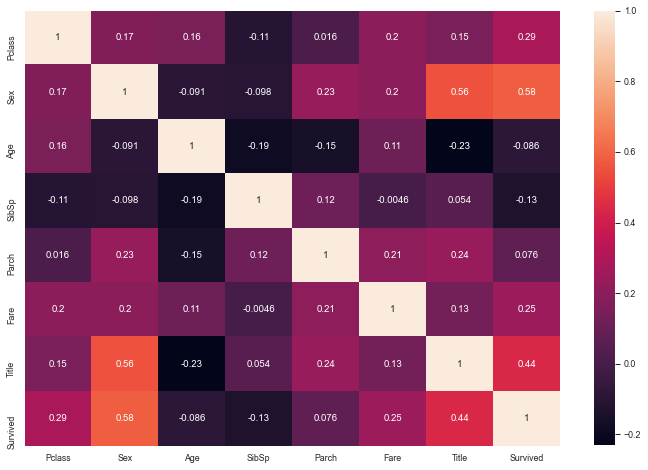

In [8]:
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(), annot=True)

Notice that "Title" and "Survival" are moderately correlated. As before, "Sex" and "Survival" are correlated, but with a slightly higher value. This is expected, because this is a correlation matrix of a smaller subset of the data (before we used all the data). 

Now, it's time to run our model again, and compare it with our previous stages:

In [9]:
models['Logistic Regression 3'] = evaluate(linear_model.LogisticRegression())
models['Logistic Regression 3']['Notes'] = "Added 'Title' feature. No resampling. No Tuning"

# Compare new model with previous best:
pprint(models['Logistic Regression 1'])
pprint(models['Logistic Regression 3'])

 Died: 
	 precision :  0.8085106382978723
	 recall :  0.8636363636363636
	 f1-score :  0.8351648351648351
	 support :  88
 Survived: 
	 precision :  0.7551020408163265
	 recall :  0.6727272727272727
	 f1-score :  0.7115384615384616
	 support :  55
 accuracy :  0.7902097902097902
 macro avg: 
	 precision :  0.7818063395570993
	 recall :  0.7681818181818182
	 f1-score :  0.7733516483516483
	 support :  143
 weighted avg: 
	 precision :  0.7879688700357393
	 recall :  0.7902097902097902
	 f1-score :  0.7876162299239222
	 support :  143
 AUC :  0.8022727272727272
 Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 Notes :   Minimal Features. No resampling to address class imbalance. No hyper-parameter tun

## Round 3 Performance:

We scored about .03 (3%) higher across the board on precision, recall, f1-score and accuracy! That's not a bad improvement. We will continue to strive for improvement.